# Recommendation System for DealDay: Embracing AI and Data-Driven Insights

## Leveraging Open Source Data for Proof of Concept

As DealDay's proprietary data isn't available for this proof of concept, I am strategically employed open-source data from Amazon and Home Depot to simulate real-world scenarios. While the dataset differs from DealDay's actual offerings, the methodologies employed align with cutting-edge AI and data science practices. This approach allows us to showcase how AI-driven recommendation systems can be harnessed to deliver personalized experiences for DealDay users.

## Deploying AI and Data-Driven Strategies

Deploying AI-powered recommendation system on the DealDay platform is a strategic move that can significantly enhance user engagement, conversion rates, and improve overall sales. Here's a comprehensive strategy for integrating a recommendation system into the existing DealDay ecosystem:





In [1]:
# Import necessary libraries
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

## Part I: Product Popularity Based Recommendation System

**Method:** Analyzing user ratings to identify popular products.

**Advantages:**
- Quickly identifies products with high customer engagement.
- Tailors recommendations based on overall popularity.
- Particularly helpful to new customers who have no purchase history

In [2]:
# Load Amazon beauty product ratings dataset
amazon_ratings = pd.read_csv('ratings_Beauty.csv')
amazon_ratings = amazon_ratings.dropna()
# Display the first few rows of the dataset
amazon_ratings.head()


,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [3]:
# Calculate the shape of the dataset
print("Shape of the dataset:", amazon_ratings.shape)


Shape of the dataset: (2023070, 4)


In [4]:
# Group products by 'ProductId' and count the number of ratings
popular_products = pd.DataFrame(amazon_ratings.groupby('ProductId')['Rating'].count())

# Sort products by rating count in descending order
most_popular = popular_products.sort_values('Rating', ascending=False)

# Display the top 10 most popular products
most_popular.head(10)

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088
B000ZMBSPE,2041
B003BQ6QXK,1918
B004OHQR1Q,1885
B00121UVU0,1838


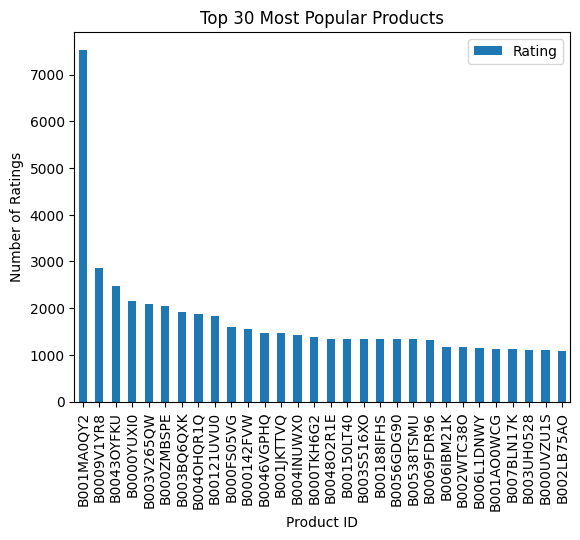

In [5]:
# Visualize the top 30 most popular products using a bar chart
most_popular.head(30).plot(kind="bar")
plt.xlabel("Product ID")
plt.ylabel("Number of Ratings")
plt.title("Top 30 Most Popular Products")
plt.show()


In [30]:
print("Ratings is on the Y axis, while the products identified by their IDs is on the left ")

Ratings is on the Y axis, while the products identified by their IDs is on the left 


## Part II: Model-Based Collaborative Filtering System

**Method:** Utilizing collaborative filtering and SVD to establish user-product correlations.

**Advantages:**
- Provides personalized recommendations by finding hidden patterns.
- Offers suggestions based on user interactions and preferences.
- Effective even for new users with limited history.

In [6]:
# Subset of Amazon Ratings
amazon_ratings1 = amazon_ratings.head(10000)

# Create a utility matrix with users as rows and products as columns
ratings_utility_matrix = amazon_ratings1.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)

# Display the first few rows of the utility matrix
ratings_utility_matrix.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Calculate the shape of the utility matrix
print("Shape of the utility matrix:", ratings_utility_matrix.shape)


Shape of the utility matrix: (9697, 886)


In [8]:
# Transpose the utility matrix to get products as rows and users as columns
X = ratings_utility_matrix.T

# Display the first few rows of the transposed matrix
X.head()


UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:

# Calculate the shape of the transposed matrix
print("Shape of the transposed matrix:", X.shape)

Shape of the transposed matrix: (886, 9697)


In [10]:
# Apply TruncatedSVD for dimensionality reduction
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)

# Calculate the shape of the decomposed matrix
print("Shape of the decomposed matrix:", decomposed_matrix.shape)

Shape of the decomposed matrix: (886, 10)


In [11]:
# Calculate the correlation matrix based on the decomposed matrix
correlation_matrix = np.corrcoef(decomposed_matrix)


In [12]:
# Calculate the shape of the correlation matrix
print("Shape of the correlation matrix:", correlation_matrix.shape)

Shape of the correlation matrix: (886, 886)


In [13]:

# Define a product for which you want to make recommendations
i = "6117036094"

# Get the index of the product in the matrix
product_names = list(X.index)
product_ID = product_names.index(i)

# Get the correlation values for the chosen product
correlation_product_ID = correlation_matrix[product_ID]


In [14]:
# Identify products with a correlation above a certain threshold (e.g., 0.90)
recommend = list(X.index[correlation_product_ID > 0.90])

# Remove the chosen product from the recommendations
recommend.remove(i)

# Display the first 9 recommended products
recommend[0:9]

['0733001998',
 '0762451459',
 '1304146537',
 '1304168522',
 '1304351475',
 '1304482596',
 '1304488608',
 '1304495396',
 '130451112X']

## Part III: Text-Based Clustering Recommendation System

**Method:** Cluster products using TF-IDF and K-Means based on textual descriptions.

**Advantages:**
- Considers contextual relevance through textual information such as descriptions.
- Offers targeted recommendations based on product characteristics rather than popularity.
- Enhances user engagement and discovery of relevant deals.


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [16]:
# Load Home Depot's product descriptions dataset
product_descriptions = pd.read_csv('product_descriptions.csv')
# Drop rows with missing values
product_descriptions = product_descriptions.dropna()
# Display the shape of the dataset
print("Shape of the dataset:", product_descriptions.shape)

Shape of the dataset: (124428, 2)


In [17]:
# Display the shape of the dataset
print("Shape of the dataset:", product_descriptions.shape)

Shape of the dataset: (124428, 2)


In [18]:

# Display the first few rows of the dataset
product_descriptions.head()


,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [19]:
# Select a subset of the product descriptions dataset
product_descriptions1 = product_descriptions.head(500)

In [20]:

# Display the first 10 product descriptions
product_descriptions1["product_description"].head(10)

0    Not only do angles make joints stronger, they ...
1    BEHR Premium Textured DECKOVER is an innovativ...
2    Classic architecture meets contemporary design...
3    The Grape Solar 265-Watt Polycrystalline PV So...
4    Update your bathroom with the Delta Vero Singl...
5    Achieving delicious results is almost effortle...
6    The Quantum Adjustable 2-Light LED Black Emerg...
7    The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8    Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9    Valley View Industries Metal Stakes (4-Pack) a...
Name: product_description, dtype: object

In [21]:
# Create a TF-IDF vectorizer to convert text into numerical vectors
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["product_description"])
# Display the TF-IDF matrix
X1


<500x8932 sparse matrix of type '<class 'numpy.float64'>'
	with 34817 stored elements in Compressed Sparse Row format>

In [22]:
# Fit a K-Means clustering model to the TF-IDF vectors
kmeans = KMeans(n_clusters=10, init='k-means++')
y_kmeans = kmeans.fit_predict(X1)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


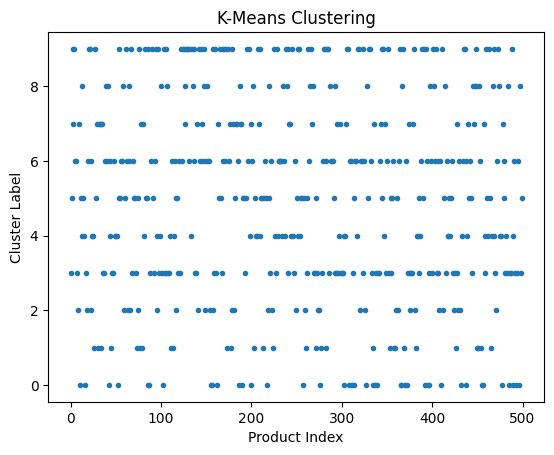

In [23]:
# Plot the clustering results
plt.plot(y_kmeans, ".")
plt.xlabel("Product Index")
plt.ylabel("Cluster Label")
plt.title("K-Means Clustering")
plt.show()

In [24]:
# Define a function to print top terms for each cluster
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

In [25]:
# Determine the optimal number of clusters using the elbow method
true_k = 10

# Fit K-Means with the chosen number of clusters
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

KMeans(max_iter=100, n_clusters=10, n_init=1)

In [26]:

# Print top terms for each cluster
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 light
 watt
 volt
 led
 power
 lighting
 bulbs
 fixture
 bulb
 leds
Cluster 1:
 natural
 color
 bamboo
 toilet
 outdoor
 wall
 finish
 indoor
 design
 piece
Cluster 2:
 water
 heater
 tank
 valve
 stainless
 nickel
 kitchen
 brass
 handle
 single
Cluster 3:
 proposition
 nbsp
 residents
 wood
 california
 65
 painted
 door
 post
 moulding
Cluster 4:
 cutting
 power
 steel
 helps
 motor
 performance
 saw
 technology
 ft
 use
Cluster 5:
 storage
 door
 shelves
 adjustable
 oven
 cooking
 shelf
 cycle
 cu
 lbs
Cluster 6:
 paint
 tape
 brush
 roller
 azek
 painting
 film
 surfaces
 trim
 projects
Cluster 7:
 metal
 drill
 tool
 screw
 grip
 speed
 hole
 screwdriver
 trigger
 bit
Cluster 8:
 air
 fan
 help
 ft
 home
 cooling
 room
 insulation
 kit
 installation
Cluster 9:
 ft
 frame
 patio
 steel
 resistant
 fabric
 easy
 coated
 plastic
 plants


In [27]:
# Define a function to show recommendations based on a product query
def show_recommendations(product):
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    print_cluster(prediction[0])


In [28]:

# Show recommendations for various product queries
show_recommendations("cutting tool")
show_recommendations("spray paint")
show_recommendations("steel drill")
show_recommendations("water")

Cluster 4:
 cutting
 power
 steel
 helps
 motor
 performance
 saw
 technology
 ft
 use
Cluster 6:
 paint
 tape
 brush
 roller
 azek
 painting
 film
 surfaces
 trim
 projects
Cluster 7:
 metal
 drill
 tool
 screw
 grip
 speed
 hole
 screwdriver
 trigger
 bit
Cluster 2:
 water
 heater
 tank
 valve
 stainless
 nickel
 kitchen
 brass
 handle
 single


## Deployment Strategy and Implementation

Integrating these methods into DealDay's platform harnesses the power of AI and data-driven insights. By leveraging popular products, user interactions, and textual context, we transform the Deals shopping experience for customers. The comprehensive deployment strategy includes data collection, model implementation, product integration, and continuous feedback for improvement.

The strategic integration of AI-driven solutions aligns with DealDay's commitment to enhance customer experience when shopping for Deals and enables us solidify our position as one of the leading platforms in Nigeria's competitive e-commerce landscape.